In [61]:
# Importando bibliotecas necessárias para análise de dados e modelagem.
import pandas as pd  # Biblioteca para manipulação de dados em dataframes.
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos.
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treino e teste.
from sklearn.linear_model import LinearRegression  # Modelo de regressão linear.
from sklearn.metrics import mean_squared_error, r2_score  # Métricas para avaliação dos modelos.
from sklearn.tree import DecisionTreeRegressor  # Modelo de árvore de decisão.
from sklearn.ensemble import RandomForestRegressor  # Modelo de floresta aleatória.
from scipy.stats import f_oneway  # Função para realizar o teste ANOVA.

In [62]:
# Definindo a função para avaliar o modelo
def evaluate_model(model, X_test, y_test):
    # Usando o modelo treinado para fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Calculando o erro quadrático médio (MSE) entre os valores reais e previstos
    mse = mean_squared_error(y_test, y_pred)

    # Calculando o coeficiente de determinação (R2) para avaliar a precisão do modelo
    r2 = r2_score(y_test, y_pred)

    # Retornando as métricas de avaliação
    return mse, r2

In [63]:
# Importando biblioteca necessária para montar o Google Drive no Google Colab.
from google.colab import drive  # Importa a biblioteca drive do módulo google.colab para acessar o Google Drive.

# Monta o Google Drive no diretório '/content/drive' para permitir acesso aos arquivos armazenados nele.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Ler o dataset
df = pd.read_csv('/content/drive/MyDrive/Projeto_Final/data.csv')

In [65]:
# Renomeando as colunas do DataFrame conforme os nomes originais do dataset.
df.columns = ['order_id', 'date', 'product_id', 'product_category', 'quantity', 'price', 'customer_id', 'total']

In [66]:
# Exibindo as primeiras linhas do dataset para uma visualização inicial.
print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
   order_id        date  product_id product_category  quantity   price  \
0         1  2020-10-20        7589         Monitors         8  614.27   
1         2  2023-10-08        3371             Mice        10  508.10   
2         3  2020-09-08        1740         Desktops         6  120.77   
3         4  2020-10-18        4816         Desktops         8  530.82   
4         5  2020-12-04        4278      Accessories         3   37.11   

   customer_id    total  
0        79908  4914.16  
1        60845  5081.00  
2        81378   724.62  
3        11908  4246.56  
4        89454   111.33  


In [67]:
# Verificação de dados ausentes por coluna no dataset.
print("\nVerificação de valores ausentes por coluna:")
print(df.isnull().sum())


Verificação de valores ausentes por coluna:
order_id            0
date                0
product_id          0
product_category    0
quantity            0
price               0
customer_id         0
total               0
dtype: int64


In [68]:
# Removendo linhas com valores ausentes do DataFrame.
df.dropna(inplace=True)

In [69]:
# Verificação de tipos de dados das colunas do DataFrame.
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
order_id              int64
date                 object
product_id            int64
product_category     object
quantity              int64
price               float64
customer_id           int64
total               float64
dtype: object


In [70]:
# Conversão da coluna 'date' para o tipo datetime para facilitar a manipulação e análise de datas.
df['date'] = pd.to_datetime(df['date'])

In [71]:
# Exibindo as primeiras linhas do dataset após a limpeza
print("Primeiras linhas do dataset após a limpeza:")
print(df.head())

# Verificando se há valores ausentes após a limpeza
print("\nVerificação de valores ausentes após a limpeza:")
print(df.isnull().sum())

Primeiras linhas do dataset após a limpeza:
   order_id       date  product_id product_category  quantity   price  \
0         1 2020-10-20        7589         Monitors         8  614.27   
1         2 2023-10-08        3371             Mice        10  508.10   
2         3 2020-09-08        1740         Desktops         6  120.77   
3         4 2020-10-18        4816         Desktops         8  530.82   
4         5 2020-12-04        4278      Accessories         3   37.11   

   customer_id    total  
0        79908  4914.16  
1        60845  5081.00  
2        81378   724.62  
3        11908  4246.56  
4        89454   111.33  

Verificação de valores ausentes após a limpeza:
order_id            0
date                0
product_id          0
product_category    0
quantity            0
price               0
customer_id         0
total               0
dtype: int64


In [72]:
# Extraindo estatísticas descritivas do dataset
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
           order_id                        date    product_id      quantity  \
count  50000.000000                       50000  50000.000000  50000.000000   
mean   25000.500000  2021-07-02 13:45:22.752000   5513.579900      5.482540   
min        1.000000         2019-01-01 00:00:00   1000.000000      1.000000   
25%    12500.750000         2020-04-01 00:00:00   3270.000000      3.000000   
50%    25000.500000         2021-07-04 00:00:00   5510.000000      5.000000   
75%    37500.250000         2022-10-01 00:00:00   7753.000000      8.000000   
max    50000.000000         2024-01-01 00:00:00   9999.000000     10.000000   
std    14433.901067                         NaN   2597.299175      2.871874   

              price   customer_id         total  
count  50000.000000  50000.000000  50000.000000  
mean     504.223881  55194.174180   2770.573092  
min       10.100000  10000.000000     10.250000  
25%      257.187500  32943.250000    872.760000  
50%      50

In [73]:
# Calculando a tendência de vendas ao longo do tempo
sales_trend = df.groupby('date')['total'].sum().reset_index()

# Exibindo a tendência de vendas ao longo do tempo
print("Tendência de vendas ao longo do tempo:")
print(sales_trend)

Tendência de vendas ao longo do tempo:
           date      total
0    2019-01-01   54866.51
1    2019-01-02  108509.37
2    2019-01-03   85422.47
3    2019-01-04   68080.99
4    2019-01-05   47817.49
...         ...        ...
1822 2023-12-28   64007.40
1823 2023-12-29   63216.77
1824 2023-12-30   82365.84
1825 2023-12-31   66720.12
1826 2024-01-01   82354.99

[1827 rows x 2 columns]


In [74]:
# Calculando a distribuição de vendas por categoria de produto
sales_by_category = df.groupby('product_category')['total'].sum().reset_index()

# Exibindo a distribuição de vendas por categoria de produto
print("\nDistribuição de vendas por categoria de produto:")
print(sales_by_category)


Distribuição de vendas por categoria de produto:
  product_category        total
0      Accessories  19898021.40
1         Desktops  19764342.55
2        Keyboards  19397834.66
3          Laptops  19607981.09
4             Mice  19412649.56
5         Monitors  20292215.84
6         Printers  20155609.50


In [75]:
# Calculando estatísticas descritivas da coluna 'total' para distribuição de vendas
sales_distribution = df['total'].describe()

# Exibindo as estatísticas descritivas
print("\nHistograma da distribuição de vendas:")
print(sales_distribution)


Histograma da distribuição de vendas:
count    50000.000000
mean      2770.573092
std       2288.748107
min         10.250000
25%        872.760000
50%       2132.325000
75%       4156.147500
max       9999.800000
Name: total, dtype: float64


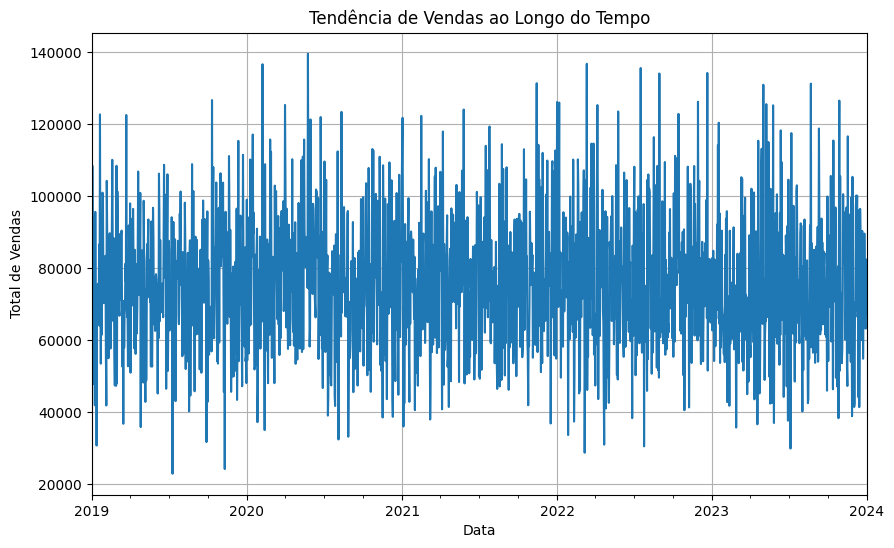

In [76]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando a tendência de vendas ao longo do tempo
df.groupby('date')['total'].sum().plot(kind='line')

# Configurando título e rótulos dos eixos
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')

# Habilitando a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()

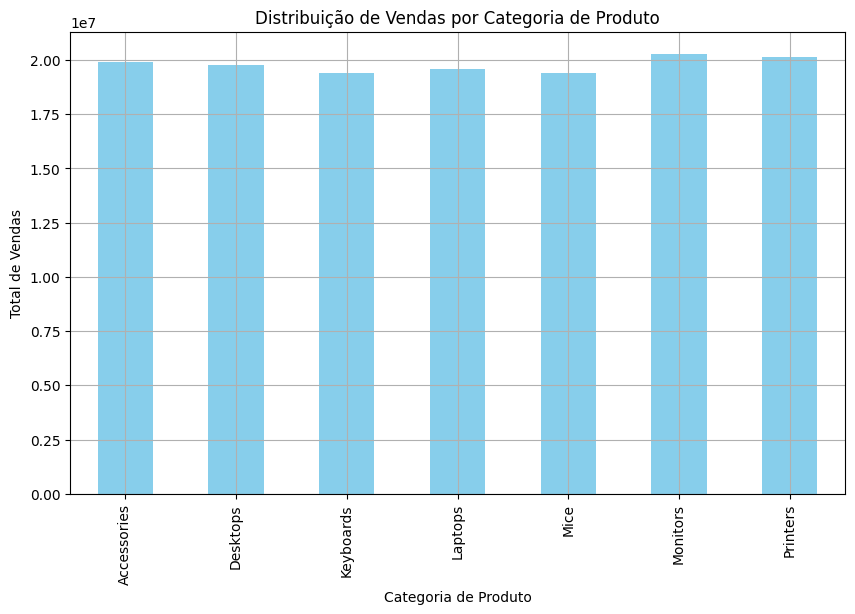

In [77]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando a distribuição de vendas por categoria de produto
df.groupby('product_category')['total'].sum().plot(kind='bar', color='skyblue')

# Configurando título e rótulos dos eixos
plt.title('Distribuição de Vendas por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total de Vendas')

# Habilitando a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()

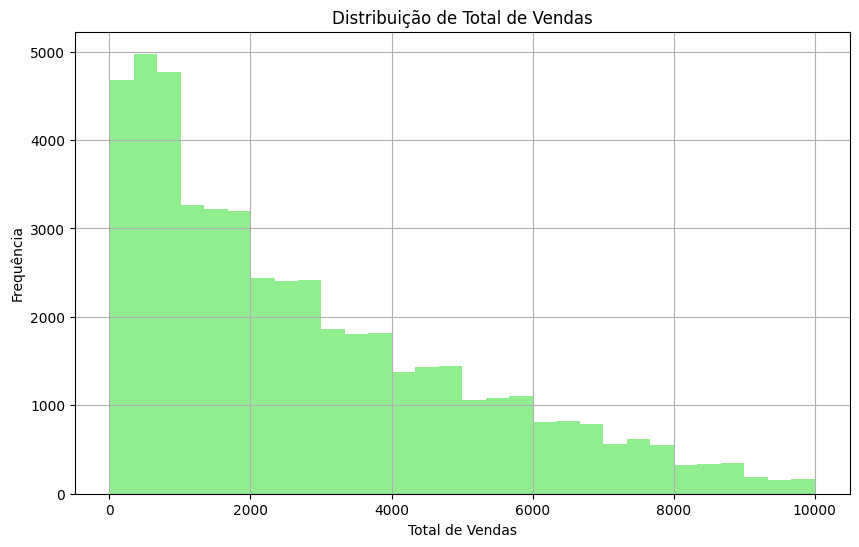

In [78]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o histograma da distribuição de vendas
df['total'].plot(kind='hist', bins=30, color='lightgreen')

# Configurando título e rótulos dos eixos
plt.title('Distribuição de Total de Vendas')
plt.xlabel('Total de Vendas')
plt.ylabel('Frequência')

# Habilitando a grade no gráfico
plt.grid(True)

# Exibindo o gráfico
plt.show()


In [79]:
# Realização do teste ANOVA para avaliar diferenças nas vendas entre as categorias de produtos
# Extração das categorias únicas de produtos no dataset
categories = df['product_category'].unique()
# Coleta dos dados de vendas para cada categoria de produto
sales_data = [df[df['product_category'] == category]['total'] for category in categories]

In [80]:
# Realiza o teste ANOVA para avaliar se há diferenças estatisticamente significativas nas vendas entre diferentes categorias de produtos.
anova_result = f_oneway(*sales_data)

# Exibe os resultados estatísticos do teste ANOVA.
print('\nResultado do Teste ANOVA:')
print(f'Estatística F: {anova_result.statistic}') # Exibe a estatística F do teste ANOVA.
print(f'Valor p: {anova_result.pvalue}') # Exibe o valor p associado ao teste ANOVA.


Resultado do Teste ANOVA:
Estatística F: 1.4004679856750195
Valor p: 0.21007681602372502


In [81]:
# Seleciona as variáveis independentes (features) para a modelagem
X = df[['quantity', 'price']]

# Seleciona a variável dependente (target) para a modelagem
y = df['total']

In [82]:
# Divisão dos dados em conjunto de treino e teste
# X_train e y_train serão usados para treinar o modelo
# X_test e y_test serão usados para avaliar o desempenho do modelo treinado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Inicialização e treinamento do modelo de regressão linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Avaliação do modelo de regressão linear usando os dados de teste
linear_mse, linear_r2 = evaluate_model(linear_model, X_test, y_test)

# Exibição das métricas de avaliação do modelo de regressão linear
print('Regressão Linear - Métricas de Avaliação do Modelo:')
print(f'Mean Squared Error (MSE): {linear_mse}')
print(f'R-squared (R2): {linear_r2}')

Regressão Linear - Métricas de Avaliação do Modelo:
Mean Squared Error (MSE): 670695.6332841093
R-squared (R2): 0.8723029505526031


In [85]:
# Inicializa e treina o modelo de Árvore de Decisão para regressão
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [86]:
# Avalia o desempenho do modelo de Árvore de Decisão utilizando métricas padrão
dt_mse, dt_r2 = evaluate_model(decision_tree_model, X_test, y_test)
print('Árvore de Decisão - Métricas de Avaliação do Modelo:')
print(f'Mean Squared Error (MSE): {dt_mse}')  # Exibe o erro quadrático médio (MSE)
print(f'R-squared (R2): {dt_r2}')  # Exibe o coeficiente de determinação (R-squared)

Árvore de Decisão - Métricas de Avaliação do Modelo:
Mean Squared Error (MSE): 1.1955414499999952
R-squared (R2): 0.999999772374967


In [87]:
# Treina o modelo de Random Forest utilizando 100 estimadores para maior robustez
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
# Avalia o desempenho do modelo de Random Forest utilizando as métricas Mean Squared Error (MSE) e R-squared (R2)
rf_mse, rf_r2 = evaluate_model(random_forest_model, X_test, y_test)
print('Random Forest - Métricas de Avaliação do Modelo:')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R2): {rf_r2}')

Random Forest - Métricas de Avaliação do Modelo:
Mean Squared Error (MSE): 0.6884279903199639
R-squared (R2): 0.9999998689267996


In [89]:
# Lista dos modelos avaliados
models = ['Regressão Linear', 'Árvore de Decisão', 'Random Forest']

# Métricas de Mean Squared Error (MSE) para cada modelo
mses = [linear_mse, dt_mse, rf_mse]

# Métricas de R-squared (R2) para cada modelo
r2s = [linear_r2, dt_r2, rf_r2]

In [90]:
# Cria um DataFrame para comparar os modelos
comparison_df = pd.DataFrame({'Modelo': models, 'Mean Squared Error (MSE)': mses, 'R-squared (R2)': r2s})

# Exibe a comparação dos modelos
print('\nComparação dos Modelos:')
print(comparison_df)


Comparação dos Modelos:
              Modelo  Mean Squared Error (MSE)  R-squared (R2)
0   Regressão Linear             670695.633284        0.872303
1  Árvore de Decisão                  1.195541        1.000000
2      Random Forest                  0.688428        1.000000


In [91]:
print("FIM")

FIM
